# Random Forest classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-v0_8-colorblind')
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from src.utils.ds_formatter import format_all
from src.dataset import *
plt.rcParams['figure.dpi'] = 40
OLD_F_METADATA = "./data/HT_Sensor_metadata.dat"
F_METADATA = "./data/HT_Sensor_metadata_new.dat"
OLD_F_DATASET = "./data/HT_Sensor_dataset.dat"
F_DATASET = "./data/HT_Sensor_dataset_new.dat"

FEATURES = [
  'R1', 'R1_mean', 'R1_median', 'R1_dev',
  'R2', 'R2_mean', 'R2_median', 'R2_dev',
  'R3', 'R3_mean', 'R3_median', 'R3_dev',
  'R4', 'R4_mean', 'R4_median', 'R4_dev',
  'R5', 'R5_mean', 'R5_median', 'R5_dev',
  'R6', 'R6_mean', 'R6_median', 'R6_dev',
  'R7', 'R7_mean', 'R7_median', 'R7_dev',
  'R8', 'R8_mean', 'R8_median', 'R8_dev',
  'Temp.', 'Temp._mean', 'Temp._median', 'Temp._dev',
  'Humidity', 'Hum_mean', 'Hum_median', 'Hum_dev'
]

In [2]:
df = get_dataset(build_dataset=False, time_window=5)
df.shape

(253699, 41)

In [3]:
X=df[FEATURES]
y=df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f'{X_train.shape} {y_train.shape} {X_test.shape} {y_test.shape}')

(177589, 40) (177589,) (76110, 40) (76110,)


In [4]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10, bootstrap=True, verbose=1)

In [5]:
clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.8s finished


RandomForestClassifier(n_estimators=10, verbose=1)

In [6]:
y_pred=clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [7]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9999474444882407
F1-score: 0.9999474442729026
Confusion matrix:
 [[20336     0     0]
 [    0 23560     0]
 [    1     3 32210]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


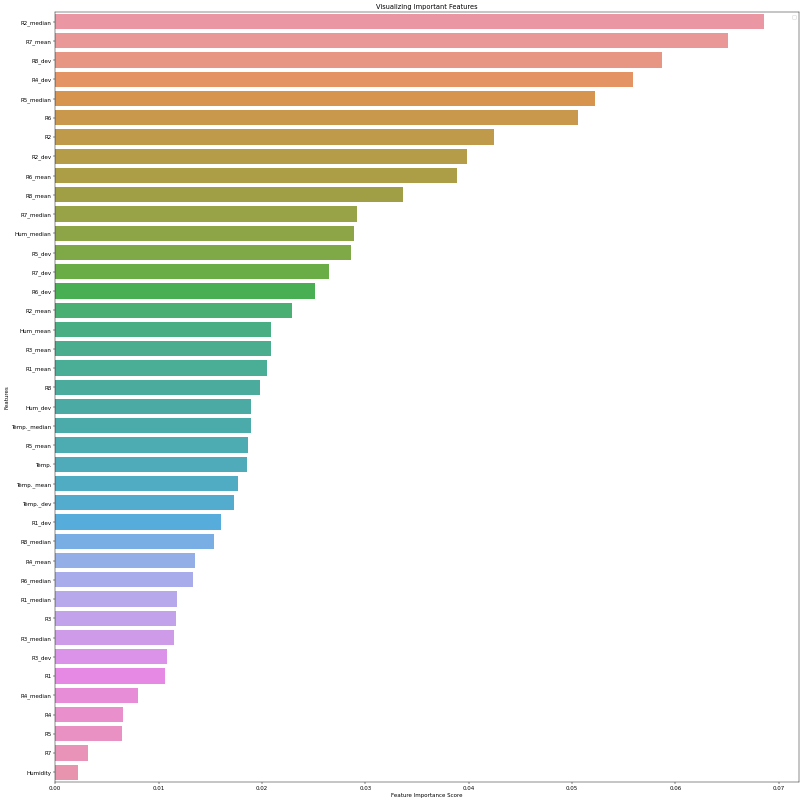

In [8]:
feature_imp = pd.Series(clf.feature_importances_,index=FEATURES).sort_values(ascending=False)
import seaborn as sns
fig, ax = plt.subplots(figsize=(24, 25))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, ax=ax)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Ahora probamos a entrenar el modelo con las features mas relevantes

In [9]:
FEATURES_2 = [
  'R1', 'R1_mean', 'R1_median', 'R1_dev',
  'R2', 'R2_mean', 'R2_median', 'R2_dev',
  'R3', 'R3_mean', 'R3_median', 'R3_dev',
  'R4', 'R4_mean', 'R4_median', 'R4_dev',
  'R5', 'R5_mean', 'R5_median', 'R5_dev',
  'R6', 'R6_mean', 'R6_median', 'R6_dev',
  'R7', 'R7_mean', 'R7_median', 'R7_dev',
  'R8', 'R8_mean', 'R8_median', 'R8_dev'
]
X=df[FEATURES_2]
y=df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f'{X_train.shape} {y_train.shape} {X_test.shape} {y_test.shape}')

(177589, 32) (177589,) (76110, 32) (76110,)


In [10]:
clf=RandomForestClassifier(n_estimators=10, bootstrap=True, verbose=1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred, average='weighted'))
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.9999343056103008
F1-score: 0.9999343061811631
Confusion matrix:
 [[20446     0     0]
 [    0 23453     1]
 [    0     4 32206]]
